In [1]:
#########     计算系数       ###################

m = 1000    ### 资金
price = 3600    ### 价格
shou = 10    ### 每手多少吨/单位
rmb = 10    ### 每手变动1个点多少钱

rrr_temp = m / price / shou * rmb

print(rrr_temp)


0.2777777777777778


C:\Users\caoxi\AppData\Local\Temp\ipykernel_12256\2574458798.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_new['volume'][i] = data_1_new['close'][i] - data_1_new['close'][i-1]
C:\Users\caoxi\AppData\Local\Temp\ipykernel_12256\2574458798.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aaa1.iloc[i] = aaa1.iloc[i] * -1
C:\Users\caoxi\AppData\Local\Temp\ipykernel_12256\2574458798.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

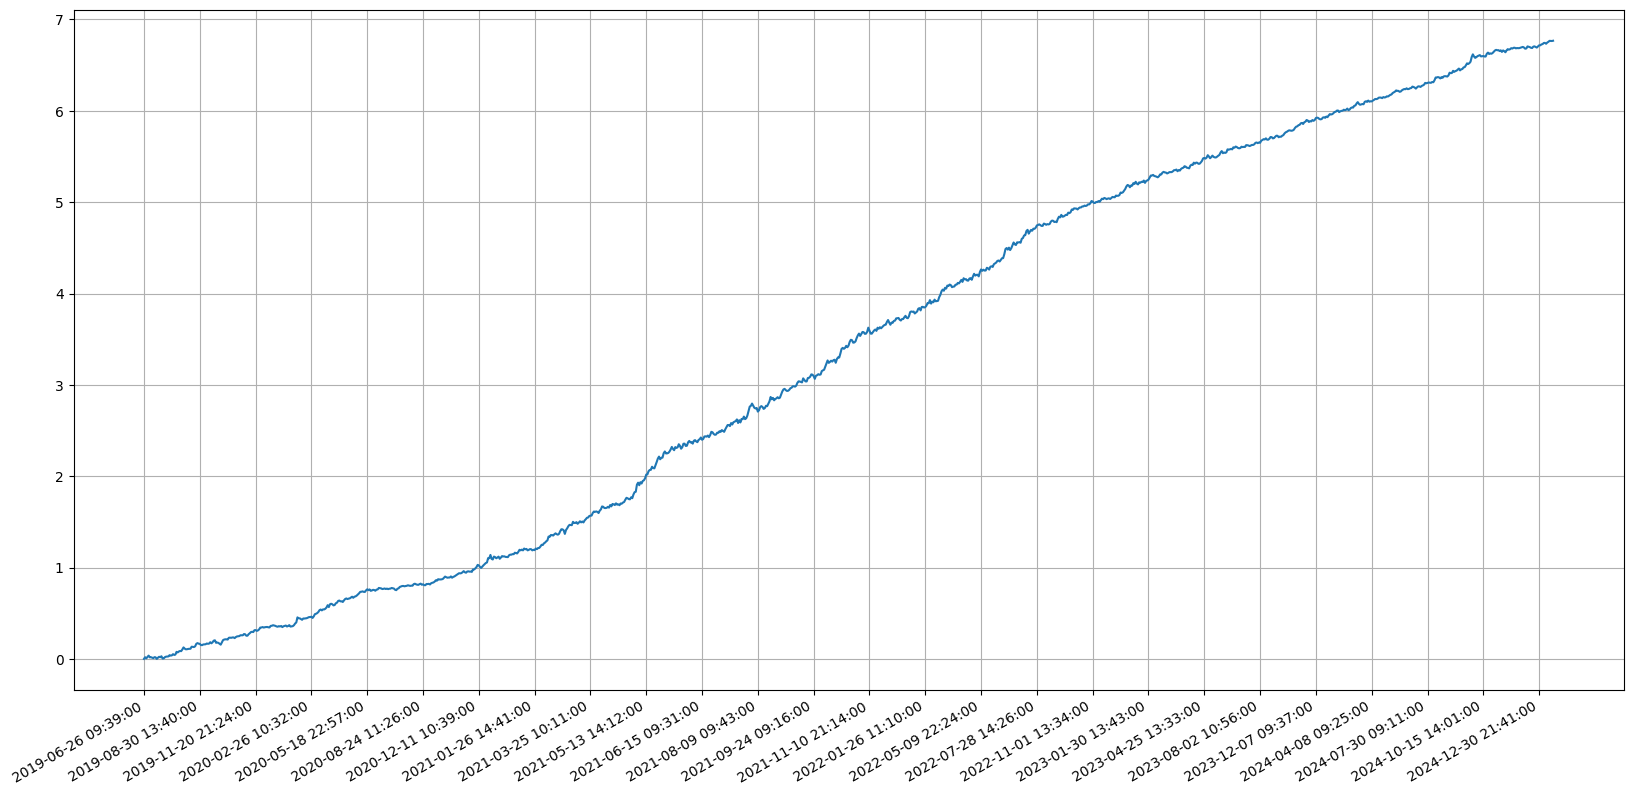

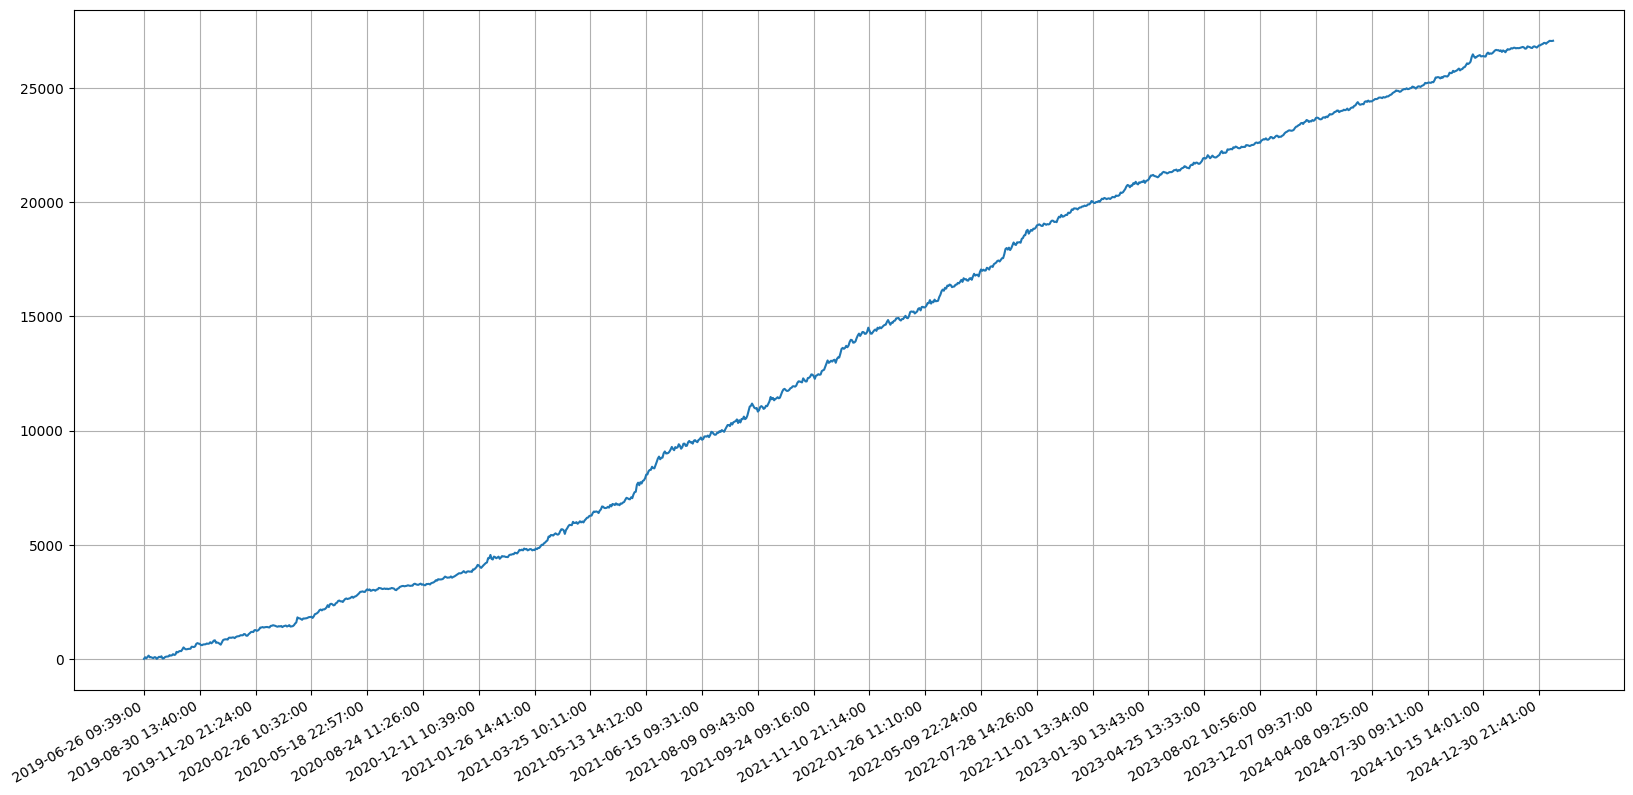

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_name ='RB99_1m_Turnover_1_1343_359.csv'     ##########  轴文件 ##########
data_1 = pd.read_csv(file_name)

file_name ='RB99_1m_Turnover_1_1343_359_Label_513.csv'        ######### 标签文件 ###########
data_2 = pd.read_csv(file_name)

data_1_size = 1213     ###### 测试数据行数  ###############
m_size = 25     ####### 测试多少个月 #######
buy = 1     ##### 多 ###################
sell = 0     ##### 空 ####################
rrr = 0.25     ###### 系数 ###################
m = 1000     ###### 总资金 ###################

data_1_new = data_1.tail(data_1_size+1)

data_1_new = data_1_new.reset_index(drop=True)  ###重置索引

data_2_state = data_2['state'].tail(data_1_size+1)

data_2_state = data_2_state.reset_index(drop=True)  ###重置索引

data_1_new['low'] = data_2_state

for i in range(1,data_1_size+1):
    data_1_new['volume'][i] = data_1_new['close'][i] - data_1_new['close'][i-1] 
    
data_1_new = data_1_new.tail(data_1_size)

data_1_new = data_1_new.reset_index(drop=True) ###重置索引

data_1_new.to_csv("Show.csv",index = False)

aaa1 = data_1_new['volume']
bbb1 = data_1_new['low']

if buy == 0:
    for i in range(0,data_1_size):
        if bbb1.iloc[i] == 1:
            aaa1.iloc[i] = aaa1.iloc[i] * -1
else:
    for i in range(0,data_1_size):
        if bbb1.iloc[i] == 0:
            aaa1.iloc[i] = aaa1.iloc[i] * -1
            
for i in range(1,data_1_size):
    data_1_new['high'][i] = sum(data_1_new['volume'][0:(i+1)])
    
data_1_new['high'][0] = data_1_new['volume'][0]

for i in range(0,data_1_size):
    data_1_new['open'][i] = rrr * data_1_new['high'][i] / m
    

data_1_new.to_csv("Show_all.csv",index = False)
    
# plt.figure(figsize=(20,8))
fig=plt.figure(figsize=(20,10))  
plt.plot(data_1_new['eob'], data_1_new['open'])
# plt.yticks(range(0,6,1)) 
plt.xticks(range(0,data_1_size,int(data_1_size/m_size)))     
fig.autofmt_xdate()
plt.grid(1)
plt.savefig("Show_shouyi.jpg")

fig=plt.figure(figsize=(20,10))  
plt.plot(data_1_new['eob'], data_1_new['high'])
plt.xticks(range(0,data_1_size,int(data_1_size/m_size))) 
fig.autofmt_xdate()
plt.grid(1)
plt.savefig("Show_point.jpg")